# Bluetooth Classic
- 2.4GHz
- Range: 1m - 100m (10m typical)
- 合理的快速数据率：2.1 Mbps
- Power consumption:
  - High but still < Wifi < 3G
- 峰值传输电流通常在25mA左右

# Bluetooth Low Energy (BLE) 蓝牙低功耗
- 是一种新的、开放的、短距离的无线电技术，用于在低功耗设备之间传输数据。
- 提供了较低的功耗消耗，使得设备可以在电池供电的情况下长时间工作
- 启用纽扣电池的使用情况
  - < 20mA 峰值电流
  - < 5 uA 平均电流
- 低带宽：1Mbps，但没有为文件传输进行优化。
- 低延时： 无连接（在~10ms内快速建立和拆除连接）
- 限制了数据包的长度, 它是为发送小块的数据而设计的（暴露状态）
  - 它擅长于小的、不连续的数据传输。
  - 数据可以由本地事件触发。
  - 数据可以在任何时候被客户端读取。
  - 接口模型非常简单
- 信道较少，信号较胖（调制指数较高）
- 大部分时间处于睡眠状态
- Range: ~ 150 meters open field

# IEEE 802.15.4 (Zigbee)
- 用于低速率WPAN应用的IEEE标准, 是一种无线网络通信标准
- 定义了在小范围内建立和管理无线个人局域网（WPAN）的规范
- 目标：中低比特率，适度的延迟，没有太严格的保证要求，低能耗
- 802.15.4规范不涉及网络层
  - 支持两种网络拓扑结构：
  - 星形拓扑结构
  - 点对点的拓扑结构
  - 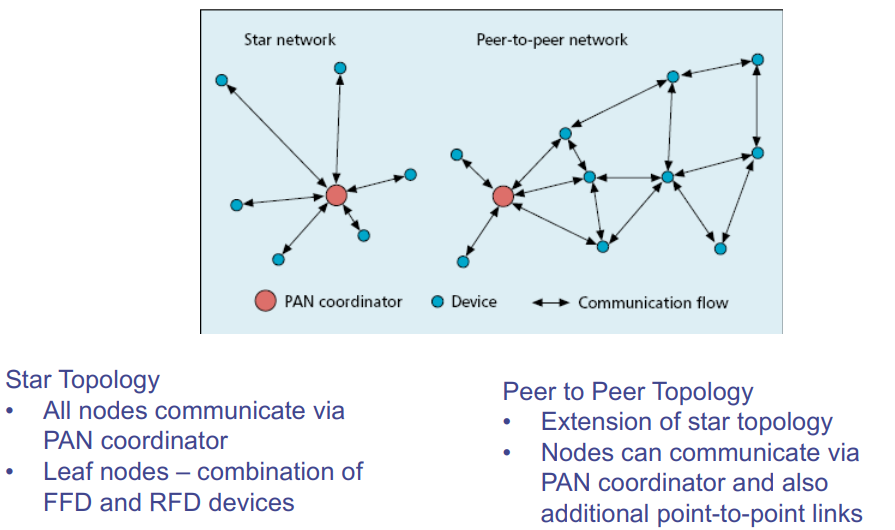
- Physical layer 两个潜在的物理层
  - 868/915Mhz 和 2.4Ghz
  - 相同的数据包结构
  - 共有27个频率通道
  - 留给网络层的动态信道选择
  - 20 kbps over 1 channel @ 868-868.6 MHz
  - 40 kbps over 10 channels @ 905 – 928 MHz
  - 250 kbps over 16 channels @ 2.4 GHz 
- MAC协议
  - 在任何时候都是单通道
  - 结合了基于竞争和基于时间表的方案
  - Asymmetric 非对称性：节点可以承担不同的角色
- 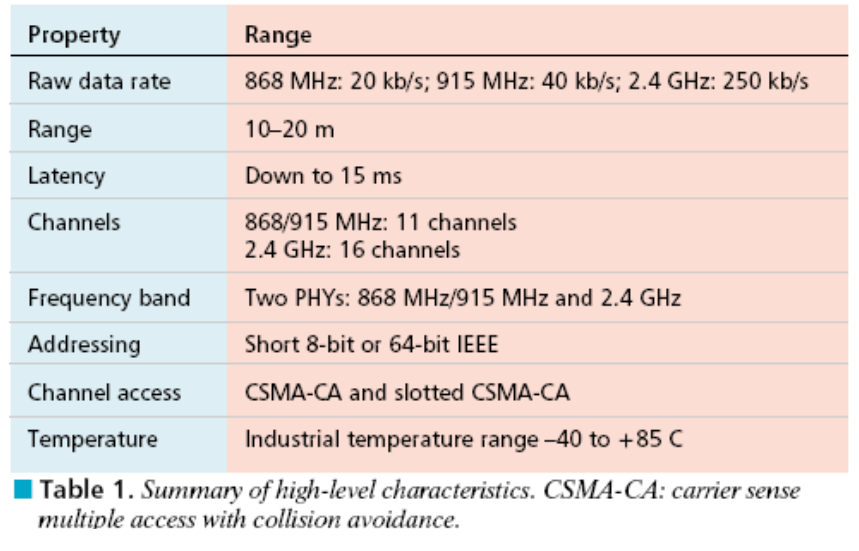

- 设备类别
  - `Full Function Devices` 全功能设备（FFD）
    - 任何拓扑结构
    - 能够进行PAN协调
    - 可与任何其他设备对话
    - 执行完整的协议栈
  - `Reduced Function Device` 减少功能的设备(RFD)
    - 减少了协议栈
    - 非常简单的实现
    - 不能成为PAN协调器
    - 在更复杂的拓扑结构中只限于叶子节点

- Network Device 设备定义
  - `Network Device` 网络设备
    - 一个包含IEEE 802.15.4介质访问控制和无线介质物理接口的RFD或FFD实现。
  - `Coordinator` 协调器
    - 一个具有网络设备功能的FFD，为网络提供协调和其他服务。
  - `PAN Coordinator` PAN协调器
    - 一个协调器，是PAN的主要控制器。一个网络正好有一个PAN协调器。

- 集群树形拓扑结构
  - 叶子节点连接到协调器网络（FFDs）。
  - 其中一个协调器作为PAN的作用
  - 簇状启动拓扑结构是一种重要的情况（例如、每个酒店房间在HVAC系统中形成一个星形）
  - 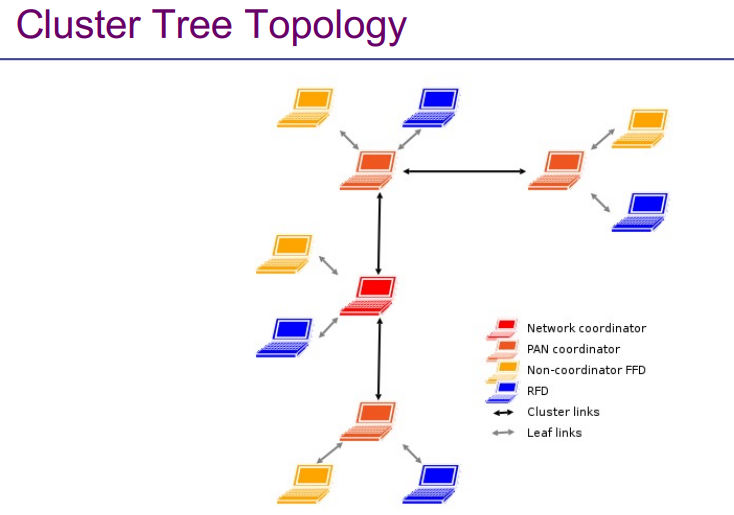


# Link Layer
- 链接层： 主要功能
  - 错误控制
    - `Automatic Repeat reQuest` 自动重复查询(ARQ)
      - 如果收到的数据包有错误，则重新发送
    - `Forward Error Correction` 前向纠错
      - 纠正少量的比特错误
  - Framing 组帧
    - 确定一个最佳的帧大小
  - 链接管理
    - 这是无线网络的具体内容

# Collection tree protocol （CTP）
- 是一种用于无线传感器网络的路由协议。它是一种层次化的路由协议，用于组织和管理传感器网络中的节点通信。
- 对 links 的真实看法
  - 如果一个数据包的信号噪声和干扰（SNIR）高于接收阈值，则该数据包被正确接收。
  - 应以概率的方式看待链接
  - 数据包接收是概率性的
  - 数据包的接收取决于方向
  - 链接质量可能随时间变化
  - 意味着：
  - 一个节点的邻居集会改变
  - 例子： 当接收良好时，节点B可以是节点A的邻居，但当接收不好时，节点B就不再是节点A的邻居了。

- 链路管理
  - 目标：一个链接应该 "建立 "到或多或少可以到达的邻居。
    - 问题：通信质量会波动，与远处的邻居通话成本高，容易出错，质量只能估计。
  - 为每个节点建立一个邻接表
    - 部分由MAC协议自动构建
  - 由于链路质量随时间变化，必须动态地估计它

- 链路评估
  - 每个节点可以通过观察发送的数据包数量中成功交付的数据包数量来估计链路质量。
  - 两类方法
    - 主动方法： `Active probes` 主动探测
      - 问题： 增加了流量
    - 被动式方法： `Snooping` 窥探
      - 问题： 无法区分一个节点不发送和该节点所有数据包丢失之间的区别。
      - 假设： 每个节点定期发送流量
      - 使用WEMA（带指数加权移动平均的窗口平均值）估计器
        - 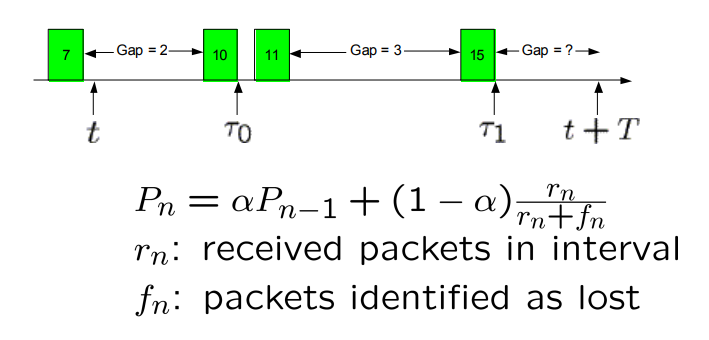
  - 估算的链路质量可以作为路由的成本指标。
  - 好的估计器应该：
    - 精度 -- 估算器应该给出统计学上正确的结果
    - 敏捷性 -- 估计器应该对变化做出快速反应
    - 稳定性 -- 估计器不应受到短期误差的影响
    - 效率 -- 内存占用小，计算简单、轻便

- 邻接表管理
  - 每个节点决定哪些邻居节点应在其邻居表中出现
  - 邻居表的大小是有限的： 如果表已满，而节点想插入一个新的邻居，它需要驱逐表中的一个现有元素 - 需要驱逐策略
  - 需要与其邻居共享链路质量信息
    - 通过链路估计，每个节点都知道它作为接收者的链路的质量
    - 节点B知道A->B的链路质量
    - 节点C知道A->C链路的质量
    - 节点A知道B->A和C->A链路的质量。

    - 为了让节点A决定使用哪个邻居节点，它需要A->B和A->C链接的质量。
    - 这可以通过相邻节点广播其估计的链路质量来获得 

- 路由的设计
  - 基于最小成本路由的设计
  - 分布式实现是通过Bellman-Ford
    - 如：路由信息协议（RIP）。注意，RIP使用跳数，但Bellman-Ford可用于任何基于总和的成本度量。
  
  - 主要问题： 什么是好的路由度量？
  - 作者通过实验评估了一些可能的路由指标
    - 选择1：最短路径
    - 选择2：考虑到链路质量的最短路径
      - SP(t)使用传递率至少为t%的链接, 例如，SP(70)只使用传递率为70%或更高的链接。
    - 选择3：最大限度地减少传输次数

  - 寻找最佳路径
    - 每条链接的成本由ETX度量给出
    - 一条路径的成本是该路径中所有链接的成本之和。
    - 现在我们可以使用Dijkstra或Bellman-Ford来计算最小成本路径。
    - 与能源效率的联系
      - 每次传输都要花费发射器和接收器的能量。如果我们能减少传输的次数，我们就能减少能源的使用。
      - 这种方法是否能减少其他形式的浪费，比如说，overhearing 偷听？

# 6LoWPAN
- Low-power RF + IPv6 = The Wireless Embedded Internet
- 6LoWPAN的好处包括：
  - 开放的、长期的、可靠的标准
  - 易于学习的曲线
  - 透明的互联网整合
  - 网络可维护性
  - 全球可扩展性
  - 端到端的数据流

- 6LoWPAN的优势
  - 数据包的压缩
    - 源（16个字节）和目的（16个字节）在空中的传输量很大。
    - 可以从低级别的协议层进行重构。(IEEE 802.15.4)
  - 可扩展的报头：
    - ICMPv6（互联网控制信息协议）。
      - 这里我们可能有RPL控制消息
    - Hop-by-Hop选项：
      - 可能包括应用消息中的RPL选项。额外的诊断信息。
    - UDP（源端口，目标端口，长度，校验）。然后是你的应用数据。
    - 分片：较大的数据包可以重构多个小数据包。

- 6LoWPAN寻址
  - IPv6地址在6LoWPAN中被压缩了
  - LoWPAN的工作原理是
    - 扁平的地址空间（无线网络是一个IPv6子网）
    - 具有唯一的MAC地址（如64位或16位）。
  - 6LoWPAN通过以下方式压缩IPv6地址
    - 省略IPv6前缀
      - 网络中所有节点都知道的全球前缀
      - 由报头压缩格式表示的链接本地前缀。FE80::/10
    - 压缩接口ID
      - 为链路本地通信而省略
      - 对于多跳dst/src地址进行压缩
    - 用众所周知的 "上下文 "进行压缩
    - 多播地址被压缩

# RPL
- 低功率和有损网络的路由协议 Routing Protocol for Low-Power and Lossy Networks
- 处理的问题：
  - 由受限节点组成的低功率和有损网络（LLNs）。
  - 有损和不稳定的链路，通常支持低数据率，以及相对较低的数据包交付率
  - 有可能包括多达数千个节点。
- 特定的应用要求：
  - 家庭自动化
  - 商业建筑自动化
  - 工业自动化
  - 城市环境
- 协议名为RPL，发音为Ripple：
  - RFC6550--一种主动的距离矢量方法
  - 低功率和有损网络上的路由（ROLL）。

- ROLL RPL
  - 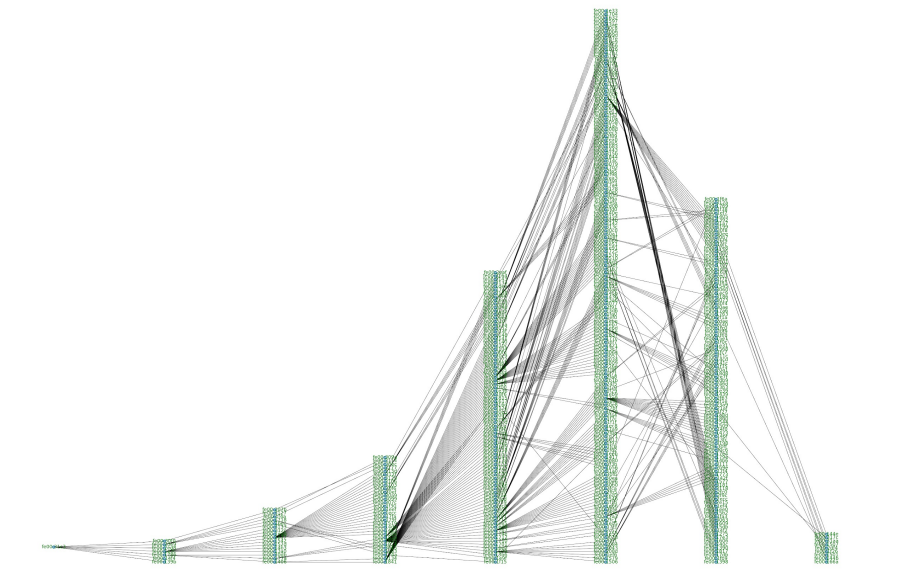
  - 基于一个或多个DODAG的路由：
    - 目的地导向的定向无环图
    - 意思是没有循环，就像一棵树。结束于向上或向下。
    - 方向是向上或向下（应用数据包），有一些例外。
  - 每个节点选择一个父节点：
    - 到达边界路由器的总体成本最低
    - 根据目标函数。
    - 可处理多个DAG
  - RPL control messages
    - 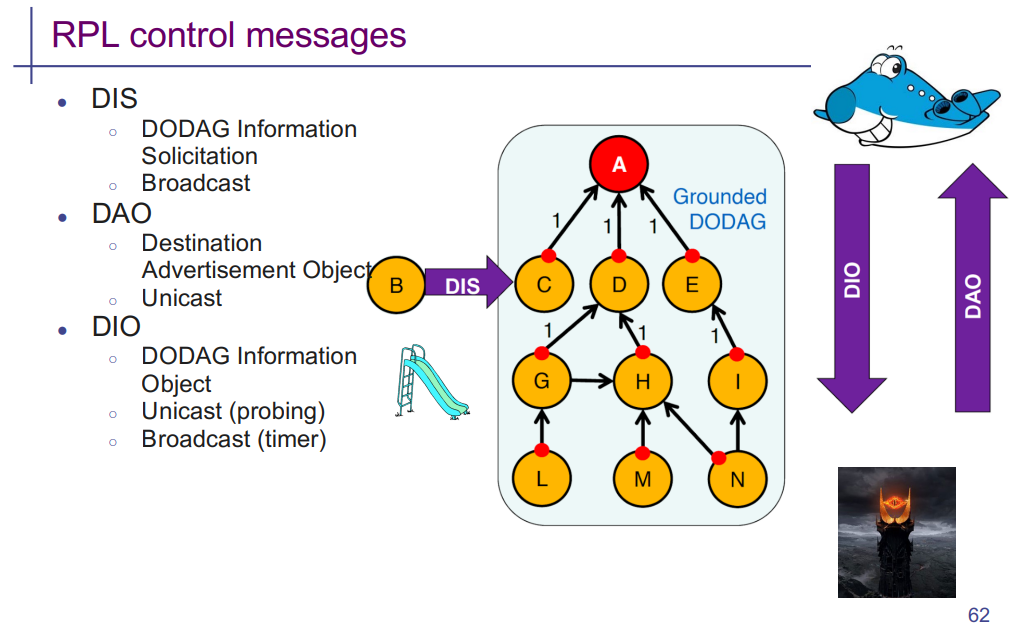

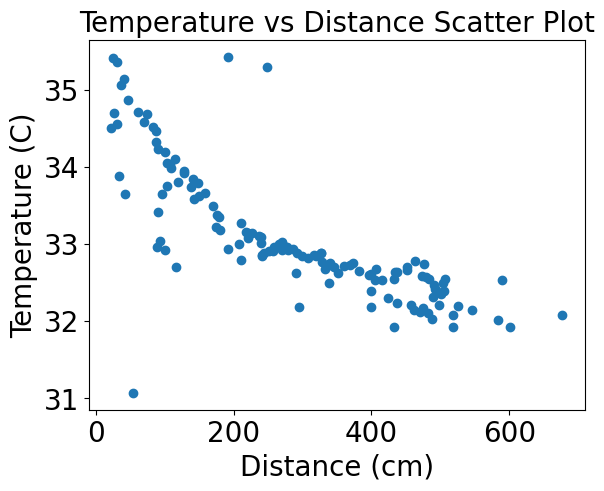

In [56]:
import matplotlib.pyplot as plt

date_list = [[34.51, 22.8], [35.42, 25.2], [34.7, 26.72], [34.56, 31.0], [35.36, 31.04], [33.89, 34.32], [35.06, 36.8], [35.14, 40.84], [33.65, 42.9], [34.87, 46.44], [31.07, 53.68], [34.71, 61.92], [34.58, 69.76], [34.69, 75.06], [34.52, 82.58], [34.47, 87.58], [34.32, 88.16], [32.96, 89.28], [34.23, 90.52], [33.42, 91.08], [33.04, 93.76], [33.65, 95.6], [34.2, 100.08], [32.92, 101.2], [34.06, 103.48], [33.75, 104.2], [34.04, 108.1], [33.99, 108.72], [34.1, 115.64], [32.71, 116.74], [33.81, 119.12], [33.95, 127.86], [33.92, 128.84], [33.74, 138.9], [33.84, 140.64], [33.59, 143.34], [33.79, 149.04], [33.63, 149.54], [33.66, 158.36], [33.49, 170.46], [33.22, 174.66], [33.38, 176.1], [33.35, 179.04], [33.19, 180.42], [35.43, 191.9], [32.94, 192.26], [33.0, 207.9], [33.27, 210.84], [32.79, 211.14], [33.16, 218.44], [33.08, 220.6], [33.14, 221.04], [33.14, 227.06], [33.11, 236.4], [33.09, 240.04], [33.02, 240.22], [32.86, 240.6], [32.85, 241.92], [32.89, 244.34], [35.3, 249.08], [32.91, 250.9], [32.91, 256.66], [32.97, 259.44], [33.0, 265.92], [33.03, 270.3], [32.92, 270.3], [32.97, 270.54], [32.99, 271.5], [32.97, 277.28], [32.92, 278.78], [32.94, 286.5], [32.63, 291.06], [32.88, 292.14], [32.18, 295.08], [32.85, 299.16], [32.82, 308.7], [32.86, 316.3], [32.85, 319.12], [32.89, 326.86], [32.89, 327.2], [32.77, 328.9], [32.68, 332.76], [32.5, 338.66], [32.73, 340.46], [32.76, 340.48], [32.7, 346.16], [32.63, 351.6], [32.72, 359.72], [32.73, 369.16], [32.75, 373.6], [32.65, 382.34], [32.6, 396.0], [32.61, 399.56], [32.19, 399.78], [32.39, 400.06], [32.53, 405.26], [32.68, 406.42], [32.53, 415.2], [32.3, 424.2], [32.55, 432.3], [31.93, 432.46], [32.64, 434.7], [32.24, 436.9], [32.64, 437.2], [32.7, 451.16], [32.66, 451.16], [32.21, 457.2], [32.14, 462.02], [32.78, 462.54], [32.12, 470.28], [32.59, 473.14], [32.17, 474.54], [32.74, 476.82], [32.57, 479.68], [32.11, 482.02], [32.55, 484.18], [32.03, 488.0], [32.32, 488.78], [32.47, 490.3], [32.42, 492.62], [32.41, 494.18], [32.21, 497.98], [32.36, 500.38], [32.49, 503.8], [32.39, 504.62], [32.55, 507.08], [32.08, 518.88], [31.92, 519.02], [32.2, 525.62], [32.14, 545.2], [32.02, 584.18], [32.53, 589.46], [31.93, 600.82], [32.08, 676.72]]

# Extracting temperature and distance values from the list
temperatures = [item[0] for item in date_list]
distances = [item[1] for item in date_list]

# Plotting the scatter plot
plt.scatter(distances, temperatures)
plt.xlabel('Distance (cm)', fontsize=20)
plt.ylabel('Temperature (C)', fontsize=20)
plt.title('Temperature vs Distance Scatter Plot', fontsize=20)
plt.tick_params(axis='both', labelsize=20)


# Saving the plot
plt.savefig('temp_vs_dist_scatter_plot.png', format='png', bbox_inches='tight')
plt.savefig('temp_vs_dist_scatter_plot.eps', format='eps', bbox_inches='tight')


In [ ]:
import numpy as np
def outliers_filter(temperatures, distances):
    z_temperatures = np.abs((temperatures - np.mean(temperatures)) / np.std(temperatures))
    z_distances = np.abs((distances - np.mean(distances)) / np.std(distances))

    threshold = 2

    filtered_temperatures = [temp for i, temp in enumerate(temperatures) if z_temperatures[i] < threshold and z_distances[i] < threshold]
    filtered_distances = [dist for i, dist in enumerate(distances) if z_temperatures[i] < threshold and z_distances[i] < threshold]

    return filtered_temperatures, filtered_distances


38.73271777562292
7.02750929626956e-06 * x^2 + -0.0080872230503977 * x + 34.60362646260583


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


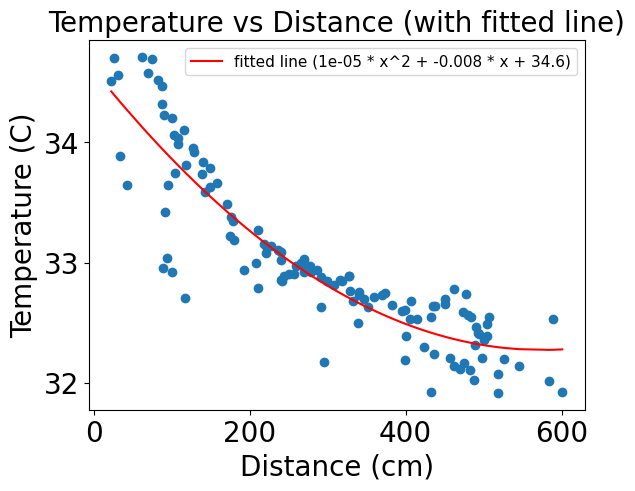

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Extracting temperature and distance values from the list
temperatures = [item[0] for item in date_list]
distances = [item[1] for item in date_list]

# Calculate z-scores for temperatures and distances
z_temperatures = np.abs((temperatures - np.mean(temperatures)) / np.std(temperatures))
z_distances = np.abs((distances - np.mean(distances)) / np.std(distances))

# Set a threshold for z-score
threshold = 2

# Filter out the outliers
filtered_temperatures = [
    temp
    for i, temp in enumerate(temperatures)
    if z_temperatures[i] < threshold and z_distances[i] < threshold
]
filtered_distances = [
    dist
    for i, dist in enumerate(distances)
    if z_temperatures[i] < threshold and z_distances[i] < threshold
]

# # Scatter plot of the filtered data
# plt.scatter(filtered_distances, filtered_temperatures)
# plt.xlabel('Distance (cm)', fontsize=20)
# plt.ylabel('Temperature (C)', fontsize=20)
# plt.title('Temperature vs Distance (without outliers)', fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=20)

# # Save the plot as a PNG file
# plt.savefig('temp_vs_dist_without_outliers.png', format='png', bbox_inches='tight')
# plt.savefig('temp_vs_dist_without_outliers.eps', format='eps', bbox_inches='tight')


# Fit a line to the data
fit = np.polyfit(filtered_distances, filtered_temperatures, 2)
fit_fn = np.poly1d(fit)

# Plotting the scatter plot without outliers and the fitted line
plt.scatter(filtered_distances, filtered_temperatures)
plt.plot(
    filtered_distances,
    fit_fn(filtered_distances),
    label=f"fitted line ({round(fit_fn.coeffs[0], 5)} * x^2 + {round(fit_fn.coeffs[1],3)} * x + {round(fit_fn.coeffs[2],2)})",
    color="red",
)
plt.legend(fontsize=11)
plt.xlabel("Distance (cm)", fontsize=20)
plt.ylabel("Temperature (C)", fontsize=20)
plt.title("Temperature vs Distance (with fitted line)", fontsize=20)
plt.tick_params(axis="both", which="major", labelsize=20)

def standardize_temperature(fit_fn, temperature, distance):
    # 计算拟合线的值
    fitted_temperature = fit_fn(distance)
    # 计算标准温度

    return (37 - fitted_temperature) + temperature

print(standardize_temperature(fit_fn, 35, 200))
print(f"{fit_fn.coeffs[0]} * x^2 + {fit_fn.coeffs[1]} * x + {fit_fn.coeffs[2]}")

# # Save the plot as a PNG file
plt.savefig("temp_vs_dist_with_fitted_line.png", format="png", bbox_inches="tight")
plt.savefig("temp_vs_dist_with_fitted_line.eps", format="eps", bbox_inches="tight")

In [3]:
# 打印现在的时间timastamp

import time
print(time.time() + 120)

# 打印十分钟后的时间timastamp
print(time.time() + 600)

# 打印一个小时后的时间timastamp
print(time.time() + 36000)

from datetime import datetime

datetime.fromtimestamp(1690614399.225985)

1691232665.0277994
1691233145.0277994
1691268545.0277994


datetime.datetime(2023, 7, 29, 17, 6, 39, 225985)